In [1]:
import sys, numpy as np, scipy as sp, matplotlib.pyplot as plt

sys.path.append('../engine')
sys.path.append('..')

from engine import analog_new as analog

# Forçar o uso de LaTeX
from matplotlib import rc
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

N = 4
Wn = [2*np.pi*59, 2*np.pi*61]
Rp = 1
Rs = 120   

freq_range = 2*pi * np.linspace(60-3, 60+3, 1000)

NameError: name 'matplotlib' is not defined

In [2]:
butter = analog.ButterworthFilter()
cheby1 = analog.ChebyshevIFilter()
cheby2 = analog.ChebyshevIIFilter()
elliptic = analog.EllipticFilter()
bessel = analog.BesselFilter()

for filter_type in [butter, cheby1, cheby2, elliptic, bessel]:
    filter_type.N = N
    filter_type.Wn = Wn
    filter_type.filter_kind = 'bandstop'
    if hasattr(filter_type, 'ripple'):
        filter_type.ripple = Rp
    if hasattr(filter_type, 'stopband_attenuation'):
        filter_type.stopband_attenuation = 80
    
    filter_type.design()
    filter_type.compute_frequencies(N=freq_range)

NameError: name 'N' is not defined

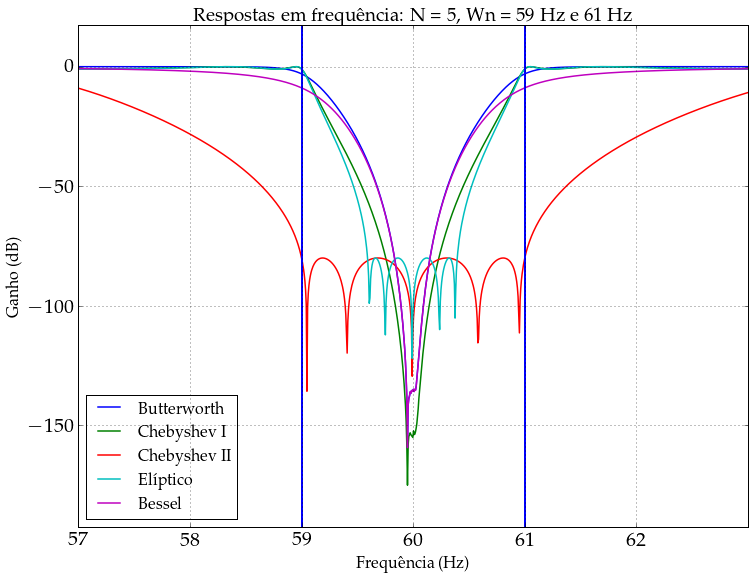

In [75]:
fig = plt.figure(1, figsize=(12, 9))

for filter_type in [butter, cheby1, cheby2, elliptic, bessel]:
    plt.plot(filter_type.W / (2 * np.pi), 20 * np.log10(abs(filter_type.H)), linewidth=1.5)
    
plt.margins(0, 0.1)
plt.xlabel('Frequ\^encia (Hz)', fontsize=16)
plt.ylabel('Ganho (dB)', fontsize=16)
ax1 = plt.gca()
ax1.set_xticks(range(57, 63))
plt.grid()
plt.legend(["Butterworth", "Chebyshev I", "Chebyshev II", "El\\'iptico", "Bessel"], loc='best', fontsize=16)
plt.axvline(59, color='blue', linewidth=2)
plt.axvline(61, color='blue', linewidth=2)
plt.title("Respostas em frequ\^encia: N = 5, Wn = 59 Hz e 61 Hz", fontsize=19)
plt.savefig("bandpass_analog.eps")